<a href="https://colab.research.google.com/github/Mhoover41/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_Project_Melissa_Hoover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction of Product Sales**


- **Author:** Melissa Hoover

### **Project Overview**

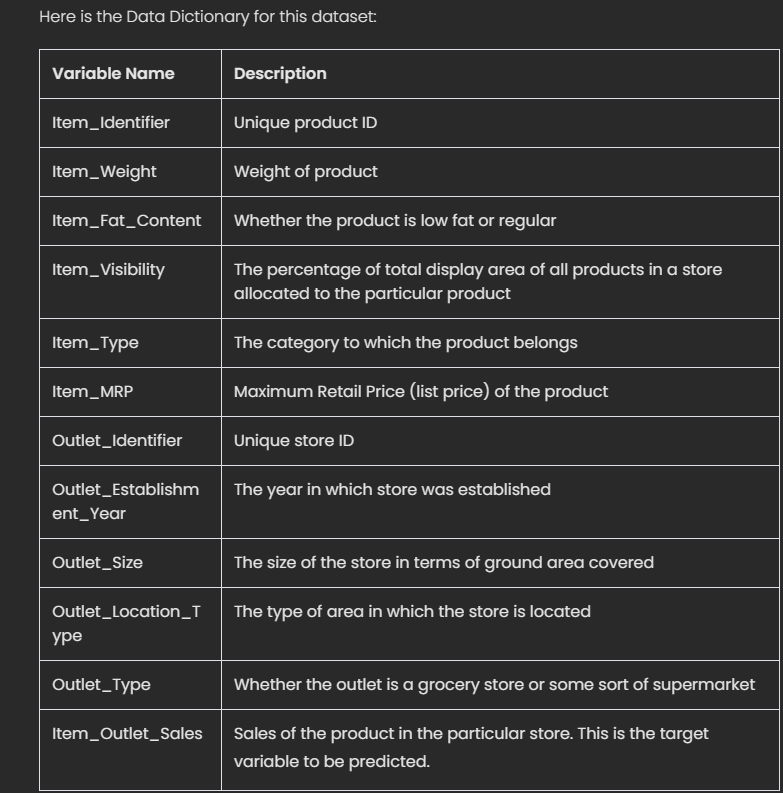

#### **Load and Inspect Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### **Imports**

In [ ]:
#Import pandas library
import pandas as pd


##### **Loading Data**

In [ ]:
#Load the data file
filename= '/content/drive/MyDrive/Data sets/sales_predictions.csv'
df= pd.read_csv(filename)


**Inspecting Data**

In [ ]:
# Display the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


  How many Rows/Columns:

In [ ]:
# Display the number of rows and columns
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns')

There are 8523 rows, and 12 columns


  - There are 8523 rows and 12 columns

##### **.Info()**

In [ ]:
# Display index, columns, null count, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Clean Data**

   

Checking the data types:

In [ ]:
# Display data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- All data types are correct.

Identifying missing values:

In [ ]:
#Display total number of missing values
missing_values= df.isna().sum().sum()
print(f"Total number of missing values is {missing_values}")

Total number of missing values is 3873


In [ ]:
# Display the count of missing values for each column
df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Display the percentage of missing values for each column
df.isna().sum()/len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

There are 17% missing values in Item Weight column.  I have decided to use the median for that column as median is less affected by outliers than the mean.

In [52]:
# Fill in median item weight for all missing values in item weight column
median_item_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_item_weight, inplace=True)
df.isna().sum()



Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Identifying % of missing values in Outlet Size column:

Since the percent missing is 28% in Outlet Size column, I have decided to fill that in with "Unknown" value instead of dropping the column.

In [54]:
#Fill in Outlet size column with 'Unknown' value
df['Outlet_Size'].fillna('Unknown', inplace=True)


Used unique() to see what the new values of the column are to make sure Unknown is there.


In [55]:
#Check to see what the new values of the Outlet Size column are and confirming Unknown is listed
df['Outlet_Size'].unique()

array(['Medium', 'Unknown', 'High', 'Small'], dtype=object)

Checked isna().sum again to make sure there are no missing values now with the changes I made.

In [56]:
#Check again to make sure there are no missing values with the changes that were made
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Checking for duplicate data:
  - There are no duplicate values 

In [53]:
# Display duplicate values
duplicated_values = df.duplicated().sum()

print(f"Total number of duplicated values is {duplicated_values}")



Total number of duplicated values is 0


Check for inconsistencies in all columns that are object data types


In [58]:
# Display Item Identifier value counts to look for any inconsistencies
df['Item_Identifier'].value_counts()


FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item Identifier column looks good, I don't see any inconsistencices.

In [60]:
# Display Item Type value counts to look for any inconsistencies
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Item Type looks good, I do not see any inconsistencies.

In [61]:
# Display Outlet Identifier value counts to look for any inconsistencies
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Outlet Identifier column looks good.

In [62]:
# Display outlet size value counts to look for any inconsistencies
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

Outlook Size column looks good.

In [63]:
# Display outlet location type value counts to look for any inconsistencies
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet location type looks good.

In [64]:
# Display outlet type value counts to look for any inconsistencies
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Outlet type looks good.

In [ ]:
#Check to see the value counts in the Item Fat Content Column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fixing Inconsistencies in values in Fat Content column:
  - Updated LF to Low Fat
  - Updated low fat to Low Fat
  - Updated reg to Regular

In [ ]:
# Replace LF to Low Fat, low fat to Low Fat, reg to Regular in Item Fat Content column
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [ ]:
#Check value counts again to view the changes made
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Statitics Summary for each numerical column:

In [65]:
#Display Item Weight summary statistics
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

In [ ]:
#Display Item Visibility summary statistics
df['Item_Visibility'].describe()

count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [ ]:
#Display Item MRP summary statistics
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [ ]:
# Display Item Outlet Sales summary statistics
df['Item_Outlet_Sales'].describe()


count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

## **Exploratory Data Analysis**

## **Explanatory Data Analysis**
